<a href="https://colab.research.google.com/github/bhoopesh-11/DL_Mini_Proj/blob/main/DL_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 categories
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [7]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7732 - loss: 0.6322 - val_accuracy: 0.8740 - val_loss: 0.3420
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8854 - loss: 0.3128 - val_accuracy: 0.8945 - val_loss: 0.2928
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9042 - loss: 0.2625 - val_accuracy: 0.8978 - val_loss: 0.2765
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9132 - loss: 0.2326 - val_accuracy: 0.9082 - val_loss: 0.2496
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9230 - loss: 0.2061 - val_accuracy: 0.9117 - val_loss: 0.2461
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9334 - loss: 0.1779 - val_accuracy: 0.9085 - val_loss: 0.2546
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9401 - loss: 0.1568 - val_accuracy: 0.9150 - val_loss: 0.2553
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9502 - loss: 0.1333 

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9083 - loss: 0.5090
Test Accuracy: 0.9088000059127808


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


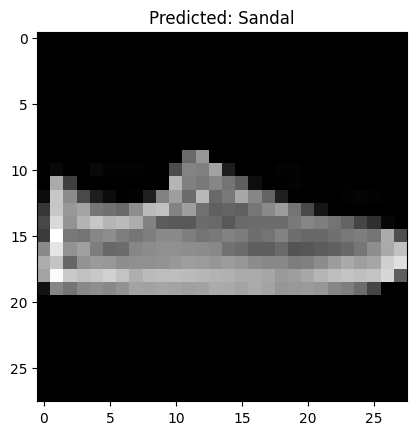

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

predictions = model.predict(X_test)

index = 12
plt.imshow(X_test[index].reshape(28,28), cmap='gray')
plt.title("Predicted: " + class_names[np.argmax(predictions[index])])
plt.show()

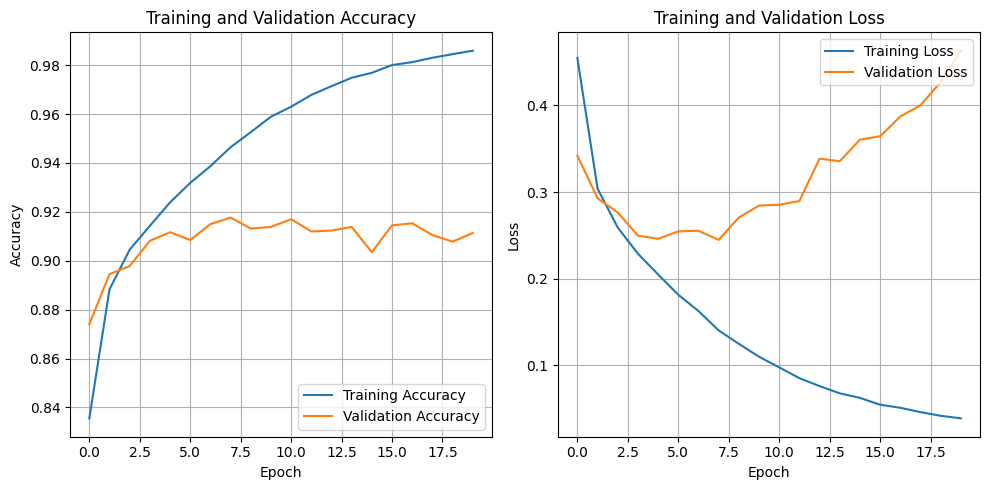

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def predict_custom_image(model, image_path, class_names):
    """
    Loads an image, preprocesses it, and predicts its class.
    """
    try:
        img = Image.open(image_path).convert('L')
        img = img.resize((28, 28))

        # Convert image to numpy array
        img_array = np.array(img)

        # Invert colors if your image has a light background (important!)
        # Fashion MNIST has black backgrounds.
        # img_array = 255 - img_array

        # Normalize and reshape for the model
        img_array = img_array / 255.0
        img_array = img_array.reshape(1, 28, 28, 1)

        # --- 2. Make a Prediction ---
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class_name = class_names[predicted_class_index]
        confidence = np.max(prediction) * 100

        # --- 3. Display the Results ---
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted: {predicted_class_name}\nConfidence: {confidence:.2f}%")
        plt.axis('off')
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file at {image_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")